# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [6]:
from keras.datasets import cifar10
cf10 = cifar10.load_data()

170500096/170498071 [==============================] - 45s 0us/step


In [7]:
cf10[0][0].shape

(50000, 32, 32, 3)

In [8]:
cf10[1][0].shape

(10000, 32, 32, 3)

In [9]:
cf10[0][1].shape

(50000, 1)

In [10]:
cf10[1][1].shape

(10000, 1)

In [0]:
X_train = cf10[0][0]
Y_train = cf10[0][1]
X_test = cf10[1][0]
Y_test = cf10[1][1]

In [12]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


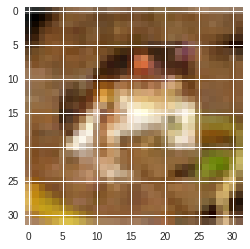

In [13]:
plt.imshow(X_train[0])

In [14]:
Y_train[0]

array([6], dtype=uint8)

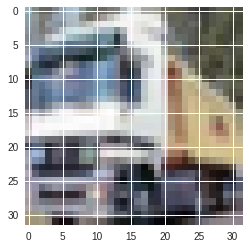

In [15]:
plt.imshow(X_train[1])

In [16]:
Y_train[1]

array([9], dtype=uint8)

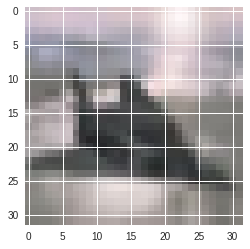

In [17]:
plt.imshow(X_test[255])

In [18]:
Y_test[255]

array([0])

In [19]:
pd.Series(Y_train.reshape(Y_train.shape[0],)).value_counts()

9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
dtype: int64

In [20]:
pd.DataFrame(Y_train).sample(10,random_state=5)

,0
24166,2
42699,8
15927,8
7473,6
5070,1
33926,0
21409,7
9495,0
16235,0
35747,6


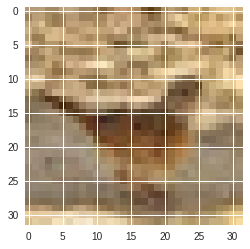

In [21]:
plt.imshow(X_train[24166])

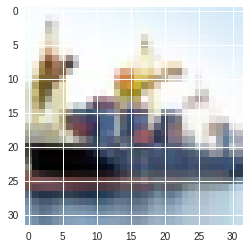

In [22]:
plt.imshow(X_train[42699])

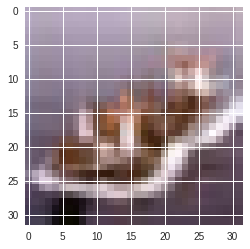

In [23]:
plt.imshow(X_train[15927])

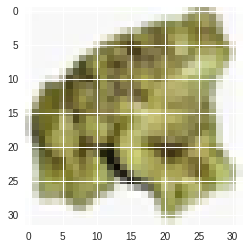

In [24]:
plt.imshow(X_train[7473])

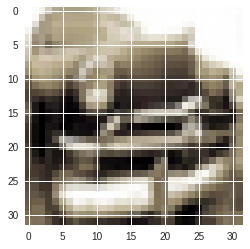

In [25]:
plt.imshow(X_train[5070])

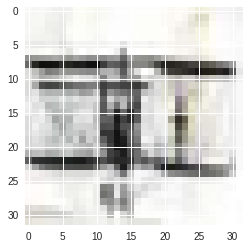

In [26]:
plt.imshow(X_train[33926])

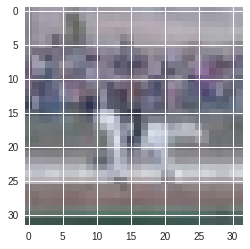

In [27]:
plt.imshow(X_train[21409])

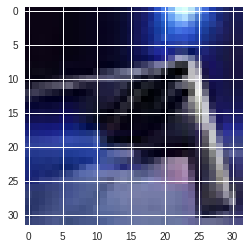

In [28]:
plt.imshow(X_train[9495])

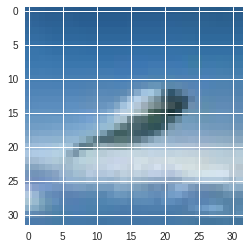

In [29]:
plt.imshow(X_train[16235])

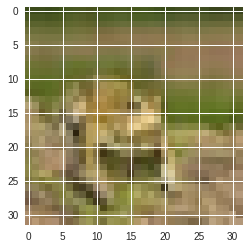

In [30]:
plt.imshow(X_train[35747])

In [31]:
pd.Series(Y_train.reshape(Y_train.shape[0],)).value_counts()

9    5000
8    5000
7    5000
6    5000
5    5000
4    5000
3    5000
2    5000
1    5000
0    5000
dtype: int64

In [0]:
X1_train = []
Y1_train = []
X2_train = []
Y2_train = []
for i in np.arange(0,Y_train.shape[0]):
  if(Y_train[i] <= 4):
    Y1_train.append(Y_train[i])
    X1_train.append(X_train[i])
  elif(Y_train[i] >= 5):
    Y2_train.append(Y_train[i])
    X2_train.append(X_train[i])

In [0]:
X1_train = np.array(X1_train)
X2_train = np.array(X2_train)
Y1_train = np.array(Y1_train)
Y2_train = np.array(Y2_train)

In [34]:
X1_train.shape

(25000, 32, 32, 3)

In [35]:
Y1_train.shape

(25000, 1)

In [36]:
X2_train.shape

(25000, 32, 32, 3)

In [37]:
Y2_train.shape

(25000, 1)

In [38]:
pd.Series(Y_test.reshape(Y_test.shape[0],)).value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

In [0]:
X1_test = []
Y1_test = []
X2_test = []
Y2_test = []
for i in np.arange(0,Y_test.shape[0]):
  if(Y_test[i] <= 4):
    Y1_test.append(Y_test[i])
    X1_test.append(X_test[i])
  elif(Y_test[i] >= 5):
    Y2_test.append(Y_test[i])
    X2_test.append(X_test[i])

In [0]:
X1_test = np.array(X1_test)
X2_test = np.array(X2_test)
Y1_test = np.array(Y1_test)
Y2_test = np.array(Y2_test)

In [41]:
X1_test.shape

(5000, 32, 32, 3)

In [42]:
X2_test.shape

(5000, 32, 32, 3)

In [43]:
Y1_test.shape

(5000, 1)

In [44]:
Y2_test.shape

(5000, 1)

In [45]:
pd.Series(Y1_train.reshape(Y1_train.shape[0],)).value_counts()

4    5000
3    5000
2    5000
1    5000
0    5000
dtype: int64

In [46]:
pd.Series(Y2_train.reshape(Y2_train.shape[0],)).value_counts()

9    5000
8    5000
7    5000
6    5000
5    5000
dtype: int64

In [47]:
pd.Series(Y1_train.reshape(Y1_train.shape[0],)).sample(5,random_state=7)

21752    4
7208     3
17058    0
20754    3
22505    0
dtype: uint8

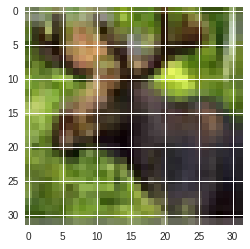

In [48]:
plt.imshow(X1_train[21752])

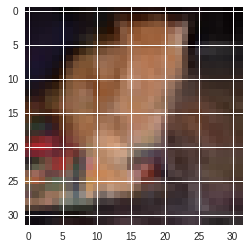

In [49]:
plt.imshow(X1_train[7208])

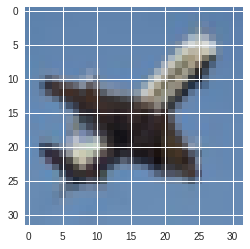

In [50]:
plt.imshow(X1_train[17058])

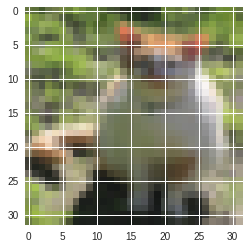

In [51]:
plt.imshow(X1_train[20754])

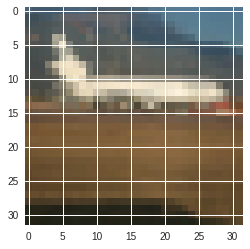

In [52]:
plt.imshow(X1_train[22505])

In [53]:
pd.Series(Y2_train.reshape(Y2_train.shape[0],)).sample(5,random_state=7)

21752    8
7208     6
17058    7
20754    7
22505    9
dtype: uint8

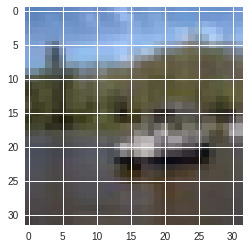

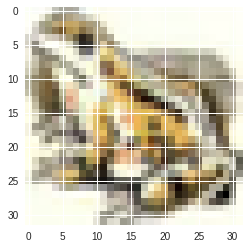

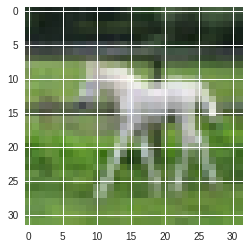

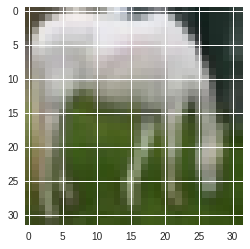

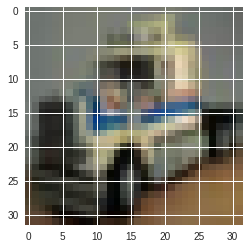

In [54]:
for i in pd.Series(Y2_train.reshape(Y2_train.shape[0],)).sample(5,random_state=7).index:
  fig = plt.figure(figsize=(6,4))
  plt.imshow(X2_train[i])
plt.show()

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
Y11_train = tf.keras.utils.to_categorical(Y1_train,num_classes=10)
Y22_train = tf.keras.utils.to_categorical(Y2_train,num_classes=10)
Y11_test = tf.keras.utils.to_categorical(Y1_test,num_classes=10)
Y22_test = tf.keras.utils.to_categorical(Y2_test,num_classes=10)

In [56]:
print(Y11_train.shape)
print(Y22_train.shape)
print(Y11_test.shape)
print(Y22_test.shape)

(25000, 10)
(25000, 10)
(5000, 10)
(5000, 10)


In [0]:
X1_train = X1_train/255
X1_test = X1_test/255

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPool2D,Dropout,BatchNormalization,Activation,Flatten
from keras.optimizers import SGD
import keras.metrics

In [0]:
model = Sequential()
model.add(Convolution2D(filters=256,kernel_size=(3,3),input_shape=(32,32,3),))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128,kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64,kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 15, 15, 256)       1024      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          73792     
__________

In [66]:
model.fit(x=X1_train,y=Y11_train,batch_size=520,epochs=10,validation_data=(X1_test,Y11_test))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 11s 425us/step - loss: 2.0053 - acc: 0.3217 - val_loss: 2.2208 - val_acc: 0.2456
Epoch 2/10
25000/25000 [==============================] - 7s 296us/step - loss: 1.5992 - acc: 0.4922 - val_loss: 1.7876 - val_acc: 0.4512
Epoch 3/10
25000/25000 [==============================] - 7s 295us/step - loss: 1.4006 - acc: 0.5655 - val_loss: 1.7231 - val_acc: 0.4374
Epoch 4/10
25000/25000 [==============================] - 7s 296us/step - loss: 1.2576 - acc: 0.6069 - val_loss: 1.5692 - val_acc: 0.4918
Epoch 5/10
25000/25000 [==============================] - 7s 296us/step - loss: 1.1598 - acc: 0.6305 - val_loss: 1.7376 - val_acc: 0.4488
Epoch 6/10
25000/25000 [==============================] - 7s 294us/step - loss: 1.0776 - acc: 0.6506 - val_loss: 1.9491 - val_acc: 0.4668
Epoch 7/10
25000/25000 [==============================] - 7s 296us/step - loss: 1.0158 - acc: 0.6673 - val_loss: 1.3839 - 

In [0]:
model1 = Sequential()
model1.add(Convolution2D(filters=256,kernel_size=(3,3),input_shape=(32,32,3),))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
model1.add(Convolution2D(filters=128,kernel_size=(3,3)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
model1.add(Convolution2D(filters=64,kernel_size=(3,3)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(128,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(64,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(32,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(16,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(10,activation='softmax'))

model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 15, 15, 256)       1024      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 64)          73792     
__________

In [70]:
model1.fit(x=X1_train,y=Y11_train,batch_size=520,epochs=15,validation_data=(X1_test,Y11_test))

Train on 25000 samples, validate on 5000 samples
Epoch 1/15
25000/25000 [==============================] - 8s 310us/step - loss: 0.3733 - acc: 0.8700 - val_loss: 0.8318 - val_acc: 0.7158
Epoch 2/15
25000/25000 [==============================] - 8s 306us/step - loss: 0.3207 - acc: 0.8879 - val_loss: 0.9032 - val_acc: 0.7240
Epoch 3/15
25000/25000 [==============================] - 8s 305us/step - loss: 0.2970 - acc: 0.8950 - val_loss: 1.5113 - val_acc: 0.5932
Epoch 4/15
25000/25000 [==============================] - 8s 307us/step - loss: 0.2755 - acc: 0.9042 - val_loss: 1.0966 - val_acc: 0.7002
Epoch 5/15
25000/25000 [==============================] - 8s 306us/step - loss: 0.2234 - acc: 0.9231 - val_loss: 0.8870 - val_acc: 0.7354
Epoch 6/15
25000/25000 [==============================] - 8s 307us/step - loss: 0.1741 - acc: 0.9419 - val_loss: 0.9770 - val_acc: 0.7318
Epoch 7/15
25000/25000 [==============================] - 8s 308us/step - loss: 0.1659 - acc: 0.9422 - val_loss: 0.9834 - v

In [71]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
model1.save('/content/gdrive/My Drive/AIML/Labs/R8/R8-External/Model1-0-4.h5')

In [59]:
model2 = Sequential()
model2.add(Convolution2D(filters=256,kernel_size=(3,3),input_shape=(32,32,3),))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Convolution2D(filters=128,kernel_size=(3,3)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Convolution2D(filters=64,kernel_size=(3,3)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(128,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(16,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10,activation='softmax'))

model2.compile(optimizer='adagrad',loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [60]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          73792     
__________

In [61]:
model2.fit(x=X1_train,y=Y11_train,batch_size=200,epochs=10,validation_data=(X1_test,Y11_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 14s 553us/step - loss: 1.3284 - acc: 0.5662 - val_loss: 1.1695 - val_acc: 0.6122
Epoch 2/10
25000/25000 [==============================] - 9s 361us/step - loss: 0.8929 - acc: 0.6902 - val_loss: 1.3778 - val_acc: 0.5750
Epoch 3/10
25000/25000 [==============================] - 9s 366us/step - loss: 0.7437 - acc: 0.7358 - val_loss: 0.8522 - val_acc: 0.6994
Epoch 4/10
25000/25000 [==============================] - 9s 363us/step - loss: 0.6427 - acc: 0.7711 - val_loss: 0.7437 - val_acc: 0.7304
Epoch 5/10
25000/25000 [==============================] - 9s 365us/step - loss: 0.5655 - acc: 0.7990 - val_loss: 0.8565 - val_acc: 0.6846
Epoch 6/10
25000/25000 [==============================] - 9s 364us/step - loss: 0.4959 - acc: 0.8231 - val_loss: 0.7031 - val_acc: 0.7454
Epoch 7/10
25000/25000 [==============================] - 9s 364us/step - 

In [62]:
model2.fit(x=X1_train,y=Y11_train,batch_size=250,epochs=15,validation_data=(X1_test,Y11_test))

Train on 25000 samples, validate on 5000 samples
Epoch 1/15
25000/25000 [==============================] - 9s 365us/step - loss: 0.2362 - acc: 0.9228 - val_loss: 0.6946 - val_acc: 0.7716
Epoch 2/15
25000/25000 [==============================] - 9s 341us/step - loss: 0.2038 - acc: 0.9358 - val_loss: 0.7457 - val_acc: 0.7628
Epoch 3/15
25000/25000 [==============================] - 9s 344us/step - loss: 0.1757 - acc: 0.9471 - val_loss: 0.7445 - val_acc: 0.7660
Epoch 4/15
25000/25000 [==============================] - 9s 343us/step - loss: 0.1503 - acc: 0.9557 - val_loss: 0.8056 - val_acc: 0.7526
Epoch 5/15
25000/25000 [==============================] - 9s 341us/step - loss: 0.1336 - acc: 0.9602 - val_loss: 0.9511 - val_acc: 0.7288
Epoch 6/15
25000/25000 [==============================] - 9s 345us/step - loss: 0.1119 - acc: 0.9689 - val_loss: 0.8029 - val_acc: 0.7710
Epoch 7/15
25000/25000 [==============================] - 9s 351us/step - loss: 0.1019 - acc: 0.9722 - val_loss: 0.7954 - v

In [0]:
model2.save('/content/gdrive/My Drive/AIML/Labs/R8/R8-External/Model2-0-4.h5')

<h4>Training and test data accuracy for cfar10 image data for 0-4 images using CNN</h4>

In [100]:
model2.evaluate(X1_test,Y11_test)

5000/5000 [==============================] - 1s 287us/step


[0.9065829043865203, 0.7774]

In [101]:
model2.evaluate(X1_train,Y11_train)

25000/25000 [==============================] - 7s 270us/step


[0.020944572722911836, 0.9974]

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [85]:
tmodel = tf.keras.models.load_model('/content/gdrive/My Drive/AIML/Labs/R8/R8-External/Model2-0-4.h5')
tmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          73792     
__________

In [0]:
tmodel.compile(optimizer='adagrad',loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
for layer in tmodel.layers:
  print(layer.name)
  print(layer.trainable)
  if(layer.name.startswith('conv2d')):
    layer.trainable = False
  print(layer.trainable)

conv2d_1
True
False
max_pooling2d_1
True
True
batch_normalization_1
True
True
conv2d_2
True
False
max_pooling2d_2
True
True
batch_normalization_2
True
True
conv2d_3
True
False
max_pooling2d_3
True
True
batch_normalization_3
True
True
flatten_1
True
True
dense_1
True
True
batch_normalization_4
True
True
dense_2
True
True
batch_normalization_5
True
True
dense_3
True
True
batch_normalization_6
True
True
dense_4
True
True
batch_normalization_7
True
True
dense_5
True
True
batch_normalization_8
True
True
dense_6
True
True


In [88]:
for layer in tmodel.layers:
  print(layer.name)
  print(layer.trainable)

conv2d_1
False
max_pooling2d_1
True
batch_normalization_1
True
conv2d_2
False
max_pooling2d_2
True
batch_normalization_2
True
conv2d_3
False
max_pooling2d_3
True
batch_normalization_3
True
flatten_1
True
dense_1
True
batch_normalization_4
True
dense_2
True
batch_normalization_5
True
dense_3
True
batch_normalization_6
True
dense_4
True
batch_normalization_7
True
dense_5
True
batch_normalization_8
True
dense_6
True


### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [0]:
X2_train = X2_train/255
X2_test = X2_test/255

In [89]:
tmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          73792     
__________

In [90]:
tmodel.fit(x=X2_train,y=Y22_train,batch_size=520,epochs=10,validation_data=(X2_test,Y22_test))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 9s 360us/sample - loss: 2.6293 - acc: 0.3614 - val_loss: 7.6147 - val_acc: 0.2130
Epoch 2/10
25000/25000 [==============================] - 7s 291us/sample - loss: 1.0618 - acc: 0.7568 - val_loss: 1.6607 - val_acc: 0.6120
Epoch 3/10
25000/25000 [==============================] - 7s 291us/sample - loss: 0.7049 - acc: 0.8285 - val_loss: 2.3887 - val_acc: 0.5532
Epoch 4/10
25000/25000 [==============================] - 7s 289us/sample - loss: 0.5652 - acc: 0.8534 - val_loss: 1.7076 - val_acc: 0.5610
Epoch 5/10
25000/25000 [==============================] - 7s 290us/sample - loss: 0.4658 - acc: 0.8763 - val_loss: 1.0389 - val_acc: 0.6984
Epoch 6/10
25000/25000 [==============================] - 7s 290us/sample - loss: 0.3913 - acc: 0.8939 - val_loss: 3.2895 - val_acc: 0.4572
Epoch 7/10
25000/25000 [==============================] - 7s 289us/sample - loss: 0.3404 - acc: 0.9063 - val_lo

In [91]:
tmodel.output

<tf.Tensor 'dense_6_2/Softmax:0' shape=(?, 10) dtype=float32>

In [0]:
z = tmodel.output
z = tf.keras.layers.Dense(255,activation='relu')(z)
z = tf.keras.layers.Dense(127,activation='relu')(z)
z = tf.keras.layers.Dense(63,activation='relu')(z)
predictions = tf.keras.layers.Dense(10,activation='softmax')(z)
tmodel_final = tf.keras.models.Model(inputs=tmodel.input,outputs=predictions)
tmodel_final.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
tmodel_final.fit(x=X2_train,y=Y22_train,batch_size=520,epochs=10,validation_data=(X2_test,Y22_test))

Train on 25000 samples, validate on 5000 samples
Epoch 1/10
25000/25000 [==============================] - 8s 312us/sample - loss: 1.0567 - acc: 0.9041 - val_loss: 0.5785 - val_acc: 0.8582
Epoch 2/10
25000/25000 [==============================] - 5s 211us/sample - loss: 0.1496 - acc: 0.9594 - val_loss: 0.5576 - val_acc: 0.8536
Epoch 3/10
25000/25000 [==============================] - 5s 213us/sample - loss: 0.1082 - acc: 0.9708 - val_loss: 0.5746 - val_acc: 0.8546
Epoch 4/10
25000/25000 [==============================] - 5s 214us/sample - loss: 0.1021 - acc: 0.9724 - val_loss: 0.5760 - val_acc: 0.8548
Epoch 5/10
25000/25000 [==============================] - 5s 212us/sample - loss: 0.0890 - acc: 0.9761 - val_loss: 0.5909 - val_acc: 0.8592
Epoch 6/10
25000/25000 [==============================] - 5s 209us/sample - loss: 0.0850 - acc: 0.9770 - val_loss: 0.5968 - val_acc: 0.8566
Epoch 7/10
25000/25000 [==============================] - 5s 214us/sample - loss: 0.0910 - acc: 0.9757 - val_lo

<h4>Training and Test data accuracy for cfar10 dataset images from 5-9 with model that was developed using Transfer learning</h4>

In [98]:
tmodel_final.evaluate(X2_test,Y22_test)

5000/5000 [==============================] - 1s 283us/sample - loss: 0.5964 - acc: 0.8580


[0.5964108216524124, 0.858]

In [99]:
tmodel_final.evaluate(X2_train,Y22_train)

25000/25000 [==============================] - 7s 267us/sample - loss: 0.0510 - acc: 0.9872


[0.05102919518500566, 0.98724]

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [0]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [6]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [7]:
pd.Series(twenty_train.target).value_counts()

3    599
2    594
1    584
0    480
dtype: int64

In [20]:
pd.Series(twenty_test.target).value_counts()

3    398
2    396
1    389
0    319
dtype: int64

In [8]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [9]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [10]:
np.count_nonzero(twenty_train.data)

2257

In [11]:
twenty_train.target[0]

1

In [12]:
twenty_train.target[2]

3

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
tfidf_train = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
dtmTrain = tfidf_train.fit_transform(twenty_train.data)

In [15]:
dtmTrain = dtmTrain.toarray()
dtmTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
dtmTrain.shape

(2257, 266963)

In [0]:
#tfidf_test = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
dtmTest = tfidf_train.transform(twenty_test.data)

In [23]:
dtmTest = dtmTest.toarray()
dtmTest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
dtmTest.shape

(1502, 266963)

In [27]:
np.count_nonzero(tfidf_train.get_feature_names())

266963

In [0]:
Y_train = twenty_train.target
Y_test = twenty_test.target

In [30]:
Y_train.shape

(2257,)

In [31]:
Y_test.shape

(1502,)

### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [0]:
from sklearn.linear_model import LogisticRegression

In [34]:
logR = LogisticRegression()
logR.fit(dtmTrain,Y_train)
print(logR.score(dtmTest,Y_test))
Y_pred = logR.predict(dtmTest)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8974700399467377


In [0]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

0.8974700399467377
              precision    recall  f1-score   support

           0       0.96      0.77      0.86       319
           1       0.85      0.97      0.91       389
           2       0.94      0.86      0.90       396
           3       0.87      0.96      0.91       398

   micro avg       0.90      0.90      0.90      1502
   macro avg       0.91      0.89      0.89      1502
weighted avg       0.90      0.90      0.90      1502

[[247  14  14  44]
 [  2 379   4   4]
 [  4  42 340  10]
 [  3  11   2 382]]
